# How to debug your battery

Picture the scene, you're an engineer at an electric vehicle company and your boss comes to you and says: *"Jeremy we've got a problem!"* (your name is Jeremy by the way) *"It's these damn batteries, there's just too many of them in the car and it's weighing us down but we really want our customers to be able to drive 400 miles without having to stop to charge!"* - What do you do? How do you debug your battery? It's a black box of magic right?!? Wrong. Use simulation.

## The **"and"** problem


It seems like there's no good solution in the market today. Batteries are either designed to be high energy **or** high power, not high energy **and** power. If we stick a bunch of high energy batteries in the vehicle we might get more range but then when we try to accelerate they overheat because the rated power is too low and the losses in the system are driven by the current. This causes us to over-engineer the cooling system (adding weight and cost) and we also find that batteries operating at higher temperatures lose capacity faster. Also there are other constraints on the battery design, such as safety, lifetime, weight and last but by no means least cost.

Below is a spider-plot of the main metrics that battery engineers tend to care about when designing or selecting cells which often compete with one another. [1]

![](https://www.ycombinator.com/media/?type=post&id=82425&key=user_uploads/1162906/ba1d3286-9e94-4cf5-a24a-8f886d18dbdd)

A good intro into cell design can be found at ![batterydesign.net](https://www.batterydesign.net/power-versus-energy-cells/). Below is an image taken from that site of the difference between high power and high energy. Thinner electrodes tend to be better for drawing larger currents because there is less material in the way of ion transport but they have more inactive material (i.e. current colllectors - the yellow bits) per unit volume making them less energy dense.

![Energy vs Power](https://www.batterydesign.net/wp-content/uploads/2022/01/power-vs-energy-cell-b.jpg)

This problem is even bigger for your buddy designing batteries for electric aircraft as the peak power needed for take-off and landing is much higher (10 x) than the power needed for cruising. So you have ot prioritize power and sacrifice range - aircraft also find it really hard to top-up charge mid flight. For a great perspective on the prospects of electric flight I recommend ![this aritcle](https://www.nature.com/articles/s41586-021-04139-1).

Luckily you know an engineer at your battery supplier and can call them to discuss the problem.

## The curse of dimensionality

The battery supplier is well aware of the difficulties in designing batteries and explains they have been spending years on the problem, testing different designs trying to optimize for different use cases. It takes a week to build and fully test one single design in the lab with all the characterization experiments they need to run and up to 3 months for cells they select for accelerated ageing tests. This is where the cell is cycled really hard constantly for at least a month and the data collected is then extrapolated to a real-world driving scenario (car mostly parked on your driveway), but going from one scenario to another isn't so straight-forward as the ageing effects are non-linear. A rough estimate for how much it costs to build and test a new battery design on a single cell (one data point) is around $1000 - $1500.

That might not sound too much but now consider how many different design decisions go into making one battery. You have to choose materials:
- Anode
- Cathode
- Electrolyte
- Separator

Each solid material can be tuned by:
- Thickness
- Porosity (amount of space for solid active material or for liquid ion transporting material)
- Particle size
- Composition if a mixture of materials

Then you have geometric factors like
- Form factor - cylindrical, prismatic, pouch
- Size i.e. 18650
- Number of tabs
- Current collector thickness
- Safety features like venting cap and central mandrel.

Each electrolyte composition can be altered too and this is often where the secret sauce actually is (but maybe more on that another day).

Let's say conservatively there are 20 things you might want to change. If you collect 3 different data points changing each thing one at a time (original design, some number higher, some number lower) whilst keeping everything else constant (usually a good scientific approach) that's 3<sup>20</sup> possible combinations of changes!

That's 3 x 3 x 3 x 3 x 3 x 3 x 3 x 3 x 3 x 3 x 3 x 3 x 3 x 3 x 3 x 3 x 3 x 3 x 3 x 3

= 3,486,784,401

![](https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExamFxc2F0a2dlMnVjNWR5Y3RzZm1sYm80bnFkdzNiMjQ0cWM2aXR6byZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o7btPCcdNniyf0ArS/giphy.gif)

The short script below illustrates the curse for a 3 variable problem. It's hard to visualize a 20 dimensional parameter space but you get the drift.

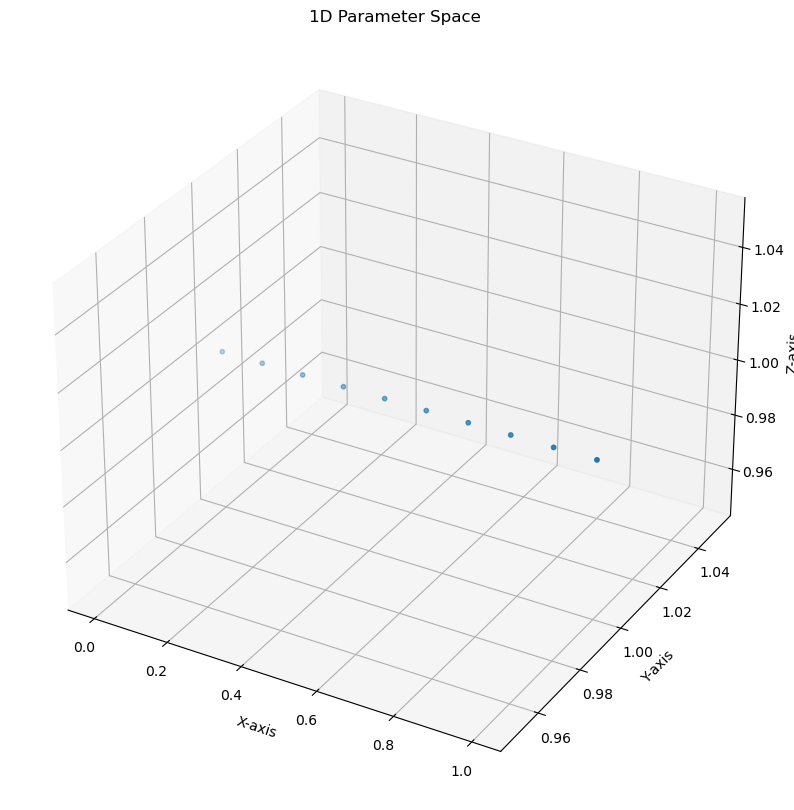

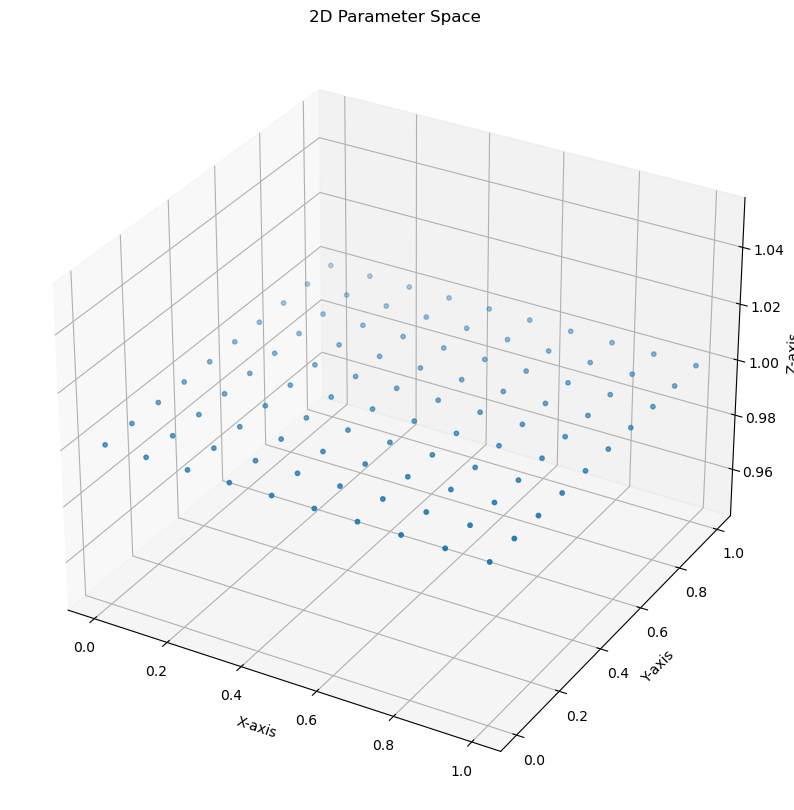

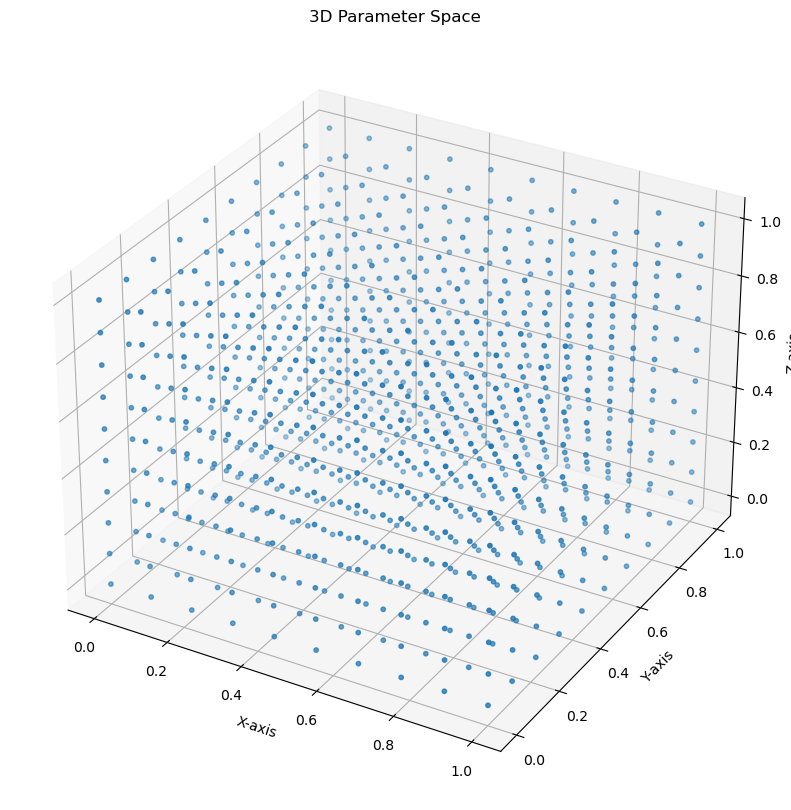

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_points(x, y, z):
    # Create a 3D plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the points
    ax.scatter(x.flatten(), y.flatten(), z.flatten(), s=10)

    # Set titles and labels
    ax.set_title(f'{np.sum(np.array(np.shape(x)) > 1)}D Parameter Space')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

    # Show plot
    plt.show()

# Generate data for 3D space
points = np.linspace(0, 1, 10)
x, y, z = np.meshgrid(points, 1, 1)
plot_points(x, y, z)
x, y, z = np.meshgrid(points, points, 1)
plot_points(x, y, z)
x, y, z = np.meshgrid(points, points, points)
plot_points(x, y, z)


Now testing 3,486,784,401 batteries is obviously a **ridiculous** thing to do and no reasonable battery developer would carry out that many experiments. Even if you parallelize by say 1000 and have a huge test facility cycling batteries constantly that's still over 1 million experiments for each cycler channel which would take at least 1 million days and cost over $1B dollars!

This is known as the curse of dimensionality (the more things you have to vary, the **exponentially** more combinations you have to test) and unfortunately batery engineers have this curse pretty bad! In fact several battery unicorns are spending basically all their money on R&D and still trying to bring their new technology to market without having yet put a single cell inside a single car.

![](https://media1.tenor.com/m/7VWWavlZJv8AAAAC/jaw-drop-omg.gif)

## A solution to the "and" problem?

Your battery cell designer has some hope for your problem though, they have been testing a new material which could deliver more energy density while retaining high power. An anode with a mixture of graphite and silicon. This being silicon valley and all you are pretty excited as there must be plenty of that around and you ask when can you get some batteries to test out....?

Well... your battery supplier says, *"we're still evaluating that material and it may be a little while longer. The intial tests in the lab look good though and there are already some cells on the market with silicon but they've had a few issues."* More on this in a bit.

Typically, the cell designers won't actually be making all the modifications and carry out all these tests themselves. They will have their own suppliers of materials and they will be doing a lot of the tests too. Let's take the anode as an example: 

The anode is the negative electrode in the cell and hosts ions in what we call the active material (think itty bitty particles). The Li ions intercalate which basically means squeeze inside the crystalline lattice of the host material and this causes the material to change in size. Once inside a process like diffusion occurs where ions migrate to the center of the material (a spherical particle for the sake of argument). As the concentration of Li ions inside the host material changes we call this lithiation i.e. filling up with lithium. This is an electrochemical process and requires electron transfer to take place which occurs when current is supplied or drawn from the cell.

Here's a great and easy to understand video by The Limiting Factor on how batteries work at the particle and atomic level.

[![](https://img.youtube.com/vi/4-1psMHSpKs/0.jpg)](https://youtu.be/4-1psMHSpKs)

Adding silicon to an anode gives more capacity to the cell as there are more host sites for lithium per unit volume but this does have one or two drawbacks. The first is what happens to the cell voltage:

There are typically several stages of the process of lithiation where the crystal structure tends to form stable phases as the degree of lithiation increases or decreases. The chemical potential of the lithiated particles is directly related to the degree of lithiation (hard to measure) and this basically translates to the open circuit potential or voltage of the material (easier to measure). 

Without diving too much deeper into the physics we can safely say, as you charge and dicharge, ions move in and out of the host material and voltage changes. The voltage changes more rapidly sometimes when crystal structures are changing or not changing from one stable phase to the next. Careful analysis of the open-circuit potential and it's derivative with respect to lithiation or capacity (dVdQ) can then reveal what the material inside might be because crystals are "somewhat" predictable. On the flip side: if you know the material you can predict the voltage (something the battery systems designers really like to know). I say "somewhat" because silicon unfortunately suffers from voltage hysteresis meaning that the voltage when charging and discharging in a cycle follows different paths, even when cycling very slowly, say 1 cycle per day. 

 

![](https://www.researchgate.net/publication/371137234/figure/fig1/AS:11431281162715436@1685416870841/Open-circuit-voltage-hysteresis-generated-by-a-viscoelastoplastic-SEI-in-comparison-to.png)

It sounds like a fairly trivial thing to know how much charge your battery has left (we call this the state of charge or SoC), why not just measure the current in and out constantly (a technique known as coulomb counting). However, counting is prone to error, if say a sensor fails or has a low accuracy or systematic error the predictions will drift over time. Voltage can be measured and gives an instant snapshot of the state of the battery and is therefore usually used as the indicator of SoC.

But is voltage reliable? No not really. Voltage has its issues too and depends on how far from equilibrium the system is. Often what happens is the battery is left at rest and then cells connected in parallel start to equalize thier open circuit potentials and current re-balances. The overall charge left in the system is still the same but the voltage at rest has relaxed closer to equilibrium compared with when you switched the system off (this also happens inside the cell as well as between cells). Voltage also depends on temperature, ageing, and also whether you are charging or dicharging the battery (hysteresis).

![](https://ars.els-cdn.com/content/image/1-s2.0-S1226086X19300942-gr7.jpg)

Another problem with silicon is that the particles swell to around 80% bigger when lithiated compared to de-lithiated. This is an issue because this causes stress to the particle itself which may break up and no-longer form an active part of the material, and it may also impact its surrounding host material, either breaking that or breaking its connection with it. These mechanical effects cause accelerated ageing of the cell where active material inventory is lost more quickly and cell capacity decreases.

Fortunately, making the particles smaller, helps both with the voltage hysteresis and the effects of swelling, it also increases the active surface area per unit mass of the silicon and this helps lower the losses associated with the reactions in the battery.

How do I know all this you might wonder? Well, there is a certain amount of intuition to these things and I have a PhD and several more years subsequently researching electrochemical systems. But the main reason is that these systems can be explored, tested and evaluated with computational simulations.

## PyBaMM to the rescue

Let's look at some cool things you can do with simulation to help debug your battery problem. ![PyBaMM](https://github.com/pybamm-team/PyBaMM/) is open-source and written in Python (that's the **Py** bit). The "BaMM" stands for **Ba**tery **M**athematical **M**odelling.

First off, what is going on inside when I charge and discharge and why is my voltage changing the way it does? Which physical processes and their related design features have the biggest effect on the voltage?

In [56]:
import pybamm
model = pybamm.lithium_ion.DFN()
parameter_values = pybamm.ParameterValues("Chen2020")
experiment = pybamm.Experiment(
    [
        "Discharge at 2C for 20 minutes",
        "Rest for 10 minutes",
    ], period="30 seconds"
)
sim = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
solution = sim.solve()
solution.plot(output_variables=["Current [A]", "Terminal voltage [V]"], time_unit="hours")

interactive(children=(FloatSlider(value=0.0, description='t', max=0.5, step=0.005), Output()), _dom_classes=('…

Here we can clearly see the big difference in voltage when we stop discharging the battery and start resting. But what exactly is going on here? A useful feature of PyBaMM is to split the voltage into it's constituent components. These are known as overpotentials. You have the ideal potential of the battery for a certain state of charge when everything is in equilibrium: the open-circuit potential (OCP) and then you have all the voltage losses associated with things not being at equilibrium.

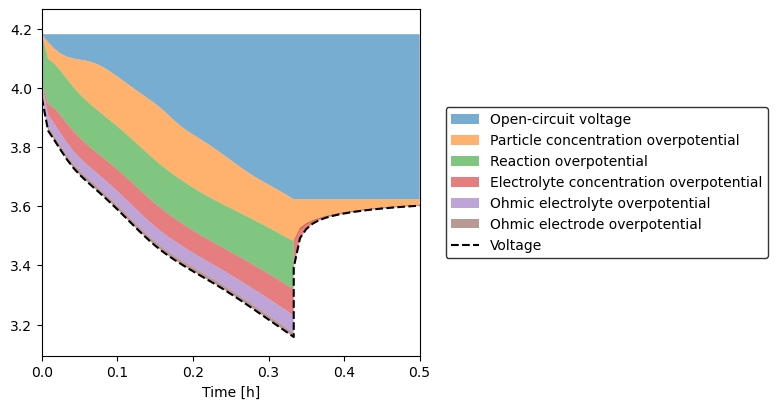

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [57]:
pybamm.plot_voltage_components(solution)

Here we can immediately learn a few things: 

- A large portion of the change in voltage of the cell is just the open circuit voltage changing as a function of lithiation (SoC), but other processes are certainly significant.
- At the point that the current stops, the voltage relaxes a great deal almost instantly. You can see the green reaction overpotential, purple Ohmic electrolyte potential and brown Ohmic electrode overpotential go from being thick sections to disappearing. This makes sense as these processes are all related to current and ion transport.
- The orange and to an extent the red concentration overpotentials are slower to disappear which means that ions are still moving in the system when no reactions are taking place and this is due to the build up of concentration gradients inside the active solid and electrolyte.
- The electrolyte losses due to concentration (overpotential) during discharge are fairly sizeable (around 100 mV) but they disappear much faster than within the active material meaning that diffusion is much easier in the electrolyte than within the solid.

We can inspect the concentration profiles in both solid particles and the electrolyte to confirm these findings. Below are 5 snapshots at the start of the rest period and afterwards.

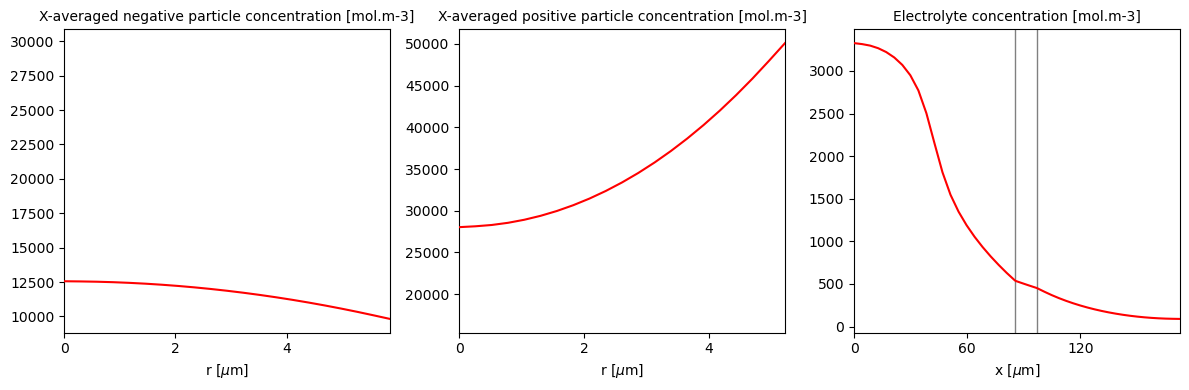

In [79]:
plotter = pybamm.QuickPlot(solutions=[solution], output_variables=[
    "X-averaged negative particle concentration [mol.m-3]",
    "X-averaged positive particle concentration [mol.m-3]",
    "Electrolyte concentration [mol.m-3]"
    ])
plotter.plot(t=[1200]) # At point of rest


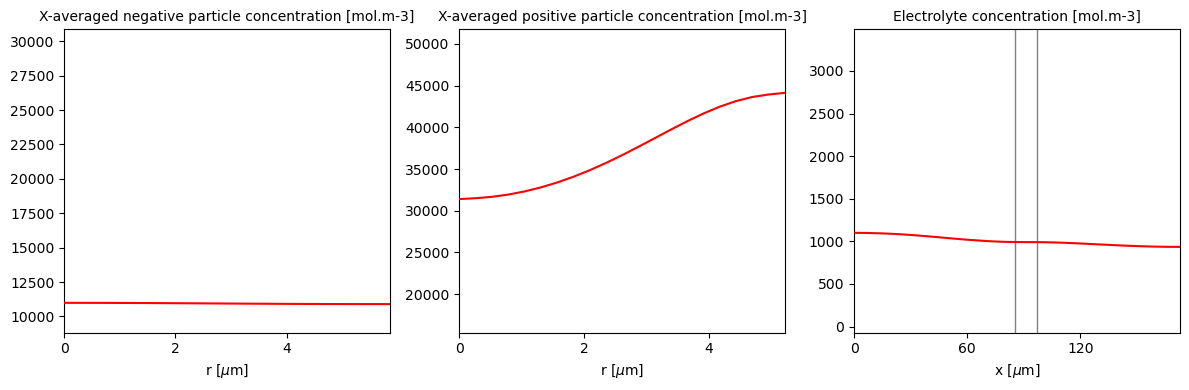

In [80]:
plotter.plot(t=[1380]) # 3 minutes after rest

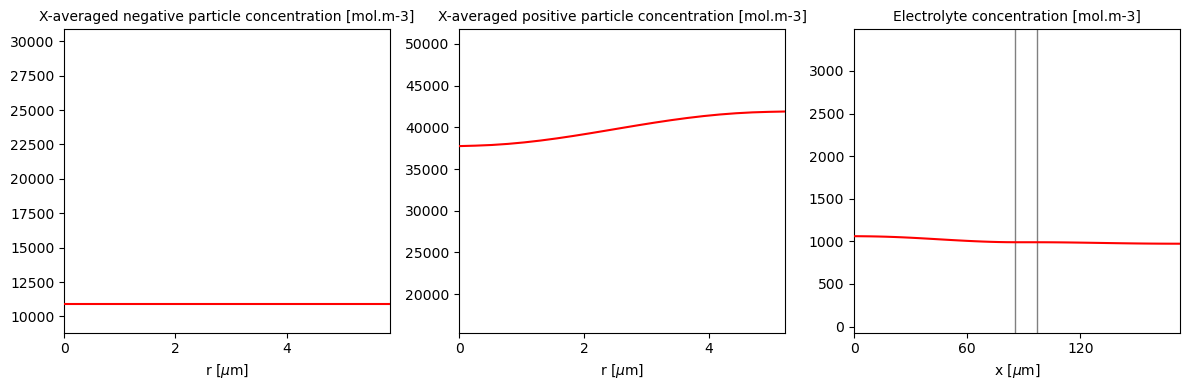

In [81]:
plotter.plot(t=[1800]) # 10 minutes after rest

The concentration in the positive particle is still not equal as a function of radius. We can intuitively guess then that changing some feature of the positive particle may have some effect on the relaxation behaviour of the cell. Let's see what the current positive particle radius is and where changing this value has a significant effect.

In [68]:
parameter_values["Positive particle radius [m]"]

5.22e-06

In [69]:
parameter_values["Positive particle radius [m]"] = 3.0e-6

In [70]:
sim2 = pybamm.Simulation(model, experiment=experiment, parameter_values=parameter_values)
solution2 = sim2.solve()

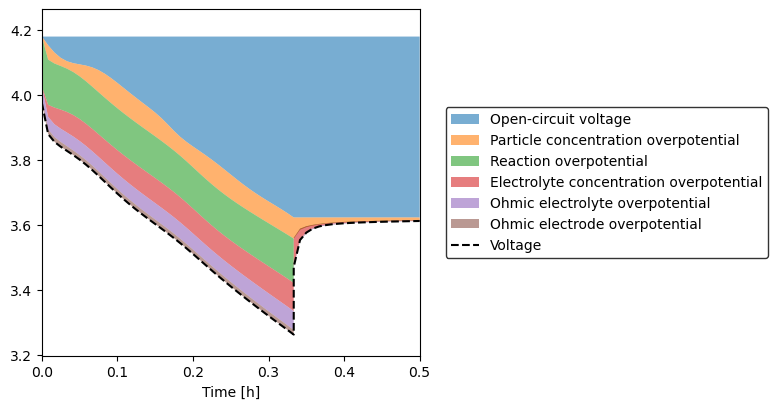

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [72]:
pybamm.plot_voltage_components(solution2)

We can now see a much faster leveling off of the voltage at rest and we can check the concentrations again

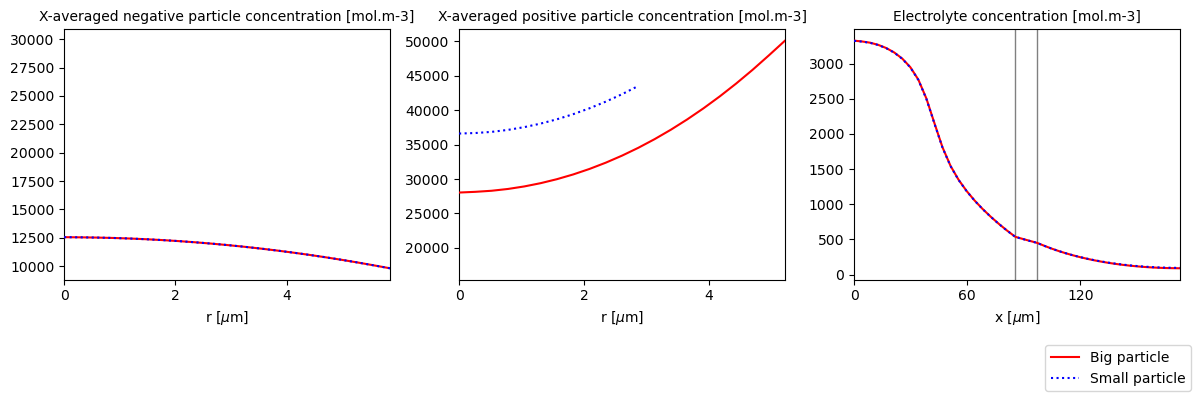

In [82]:
plotter = pybamm.QuickPlot(solutions=[solution, solution2], labels=["Big particle","Small particle"], output_variables=[
    "X-averaged negative particle concentration [mol.m-3]",
    "X-averaged positive particle concentration [mol.m-3]",
    "Electrolyte concentration [mol.m-3]"
    ])
plotter.plot(t=[1200]) # At point of rest

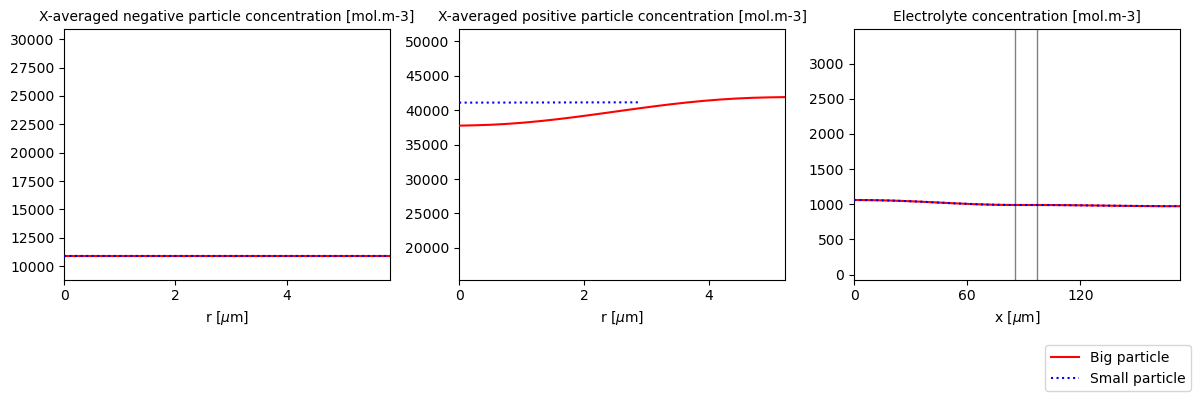

In [83]:
plotter.plot(t=[1800])

Now the contributions of the postive solid particle to the voltage at rest is resolved much more quickly than before. This is because the smaller particle size allows for faster diffusion of lithium ions in and out of the particle. This is a good example of how the model can be used to investigate the effect of different parameters on the performance of a battery.

This is just one example of how to use modelling to debug your battery problem. **PyBaMM** also has many other examples including one on modelling ![hysteresis](https://docs.pybamm.org/en/stable/source/examples/notebooks/models/differential-capacity-hysteresis-state.html) in silicon anodes. Also as we can see here a single experiment takes a matter of seconds and with some of the simpler models only a matter of ms. This helps engineers really battle the curse of dimensionality. For example the ragone plot below sweeping over some of the common parameters you might investigate changing contains 6500 data points and with each one taking less than 1s running one after the other on a single core would take under 2 hours to compute, already a massive saving compared to 6.5 days with our 1000 channel cycler lab. With parallel computing this number can be cut to less than a minute.

![](figures/ragone.png)

## References 
[1] https://www.ycombinator.com/launches/LRR-ionworks-build-and-run-battery-simulations-at-scale